In [1]:
from matplotlib import pyplot as plt
from PIL import Image, ImageOps
import numpy as np
from src.reconst import generate_V1_variables, reconstruct, error_calculation

TypeError: wavelet_based() missing 1 required positional argument: 'lv'

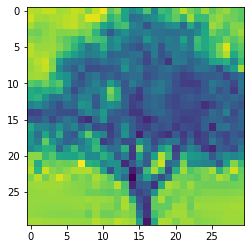

In [4]:
image_nm = 'image/tree_part1.jpg'
img = Image.open(image_nm)
img = ImageOps.grayscale(img)
img_arr = np.asarray(img)
plt.imshow(img_arr)

num_cell = 500
cell_size = 7
cell_freq = 2
alpha = 1
dwt_type = 'db1'
lv = 2

W, y = generate_V1_variables(num_cell, cell_size, cell_freq, img_arr)
theta, reconst, s = reconstruct(W, y, alpha = alpha, fit_intercept = False, 
                                dct = False, dwt = True, dwt_type = dwt_type, lv = lv)